<a href="https://colab.research.google.com/github/namankabadi/TASK_02_Email_Spam_Classification/blob/main/TASK_02_EMAIL_SPAM_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 02: EMAIL SPAM CLASSIFICATION USING PYTHON AND MACHINE LEARNING:**



We've all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, we use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam.





**AUTHOR : NAMAN KABADI**

**PROJECT NAME : EMAIL SPAM CLASSIFICATION USING PYTHON AND MACHINE LEARNING**

**COMPANY: OASIS INFOBYTE**

**Role: Data Science Intern**

**Duration : 1-08-2023 to 30-8-2023**



**IMPORTING LIBRARIES**

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [59]:
#Reading Data set
df = pd.read_csv('https://github.com/namankabadi/TASK_02_Email_Spam_Classification/raw/main/spam.csv',  encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Removing the Unnecessary columns:**

In [60]:
df = df.drop(columns = ['Unnamed: 2'])
df = df.drop(columns = ['Unnamed: 3'])
df = df.drop(columns = ['Unnamed: 4'])

In [61]:
# Data set After Data Cleaning Stage:
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [62]:
# Checking the names of the columns in the Data set collected
df.columns

Index(['v1', 'v2'], dtype='object')

In [63]:
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


The code data = df.where(pd.notnull(df), '') is used to replace all the missing (NaN or null) values in a DataFrame (df) with empty strings ('')

In [64]:
data = df.where(pd.notnull(df),'')

In [65]:
# Displays the top 5 columns from the data set
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [67]:
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [68]:
df.columns

Index(['v1', 'v2'], dtype='object')

# **Data Visualization:**

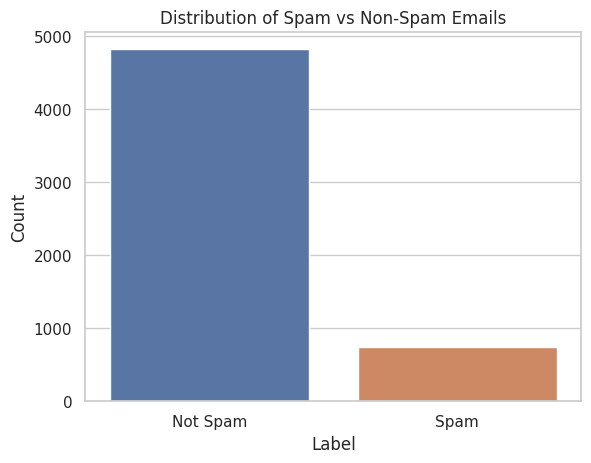

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is named 'df'
sns.set(style="whitegrid")  # Set the style

# Plot the count of spam vs. non-spam emails
sns.countplot(x='v1', data=df)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'])  # Adjust labels if needed
plt.show()


In [70]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [72]:
data.shape

(5572, 2)

In [73]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [74]:
data.describe

<bound method NDFrame.describe of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

**Feature Extraction:**

In [75]:
data.loc[data['v1']=='spam','v1',]=0
data.loc[data['v1']=='ham','v1',]=1

In [76]:
#Features v2 and v1
X=data['v2']

Y=data['v1']


In [77]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [78]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

**TRAINING MODEL:**

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [80]:
#Training and Testing sample X count
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [81]:
#Training and Testing sample Y count
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [82]:
#Importing necessary libraries
from sklearn import feature_extraction
feature_extraction = TfidfVectorizer(min_df = 1,stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [83]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: v2, Length: 4457, dtype: object


In [84]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [85]:
model = LogisticRegression()

In [86]:
model.fit(X_train_features,Y_train)

LogisticRegression()

**Evaluation of Training Model:**

In [87]:
#Evaluation of training model
prediction_on_training_data = model.predict(X_train_features)
accuracy_score_on_training =accuracy_score(Y_train,prediction_on_training_data)

In [88]:
print('Accuracy on training data : ',accuracy_score_on_training*100,'%')

Accuracy on training data :  96.61207089970833 %


In [89]:
prediction_on_test_data =  model.predict(X_test_features)
accuracy_score_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [90]:
print(prediction_on_test_data)

[1 1 1 ... 1 1 1]


In [91]:
print(prediction_on_training_data)

[1 1 1 ... 1 1 1]


In [92]:
print('Accuracy on test Data : ', accuracy_score_on_test_data*100,'%')

Accuracy on test Data :  96.23318385650225 %


In [93]:
input_your_mail=["Free entry in 2 a weekly comp to win FA Cup final on our product"]

input_data_features = feature_extraction.transform(input_your_mail)


prediction =model.predict(input_data_features)

In [94]:

if(prediction==1):
  print("Not Spam Mail")
else:
  print("Spam Mail")
print(prediction)

Spam Mail
[0]


# **ACCURACY SCORE:**

In [95]:
import plotly.express as px

model_name = 'Model Email Spam Classifier:'
accuracy_score = 96.1

fig = px.bar(x=[model_name], y=[accuracy_score], text=[f'Accuracy: {accuracy_score:.2f}%'], color_discrete_sequence=['green'])

fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Accuracy Score',
    title=f'Accuracy Score of {model_name}',
    yaxis_range=[0, 100],  # Set y-axis range
    showlegend=False  # Hide legend
)

fig.update_traces(texttemplate='%{text}', textposition='outside')  # Show text outside bars

fig.show()


CONCLUSION:
The Email Spam classification is successfully achieved using the Logistic Regression Method with an acceptable accuracy score. Also the model will predict whether a given email message is spam or not spam.